In [1]:
%pylab inline
from matplotlib.pyplot import style
import matplotlib.pyplot as plt
# custom plots from minibrain
style.use('https://raw.githubusercontent.com/JoseGuzman/minibrain/master/minibrain/paper.mplstyle')

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [2]:
mydata = pd.read_csv('./DataSets/cell_data.csv')
print(f'{mydata.shape[0]} total observations')
mydata.head()

165 total observations


,diameter,Vmb
0,19.9340,NaN
1,20.8943,-27.6512
2,16.9050,NaN
3,NaN,NaN
4,18.9130,NaN


In [3]:
# remove NaN
mydata.dropna(thresh=2, inplace=True)
print(f'{len(mydata)} non-NaN observations')

95 non-NaN observations


# Perform linear regression

In [4]:
from scipy.stats import linregress, sem
from scipy.stats import t as T

In [5]:
def plot_linregress(xdata, ydata, color = None, label = None, ax = None):
    """
    plots the linear fit together with the two-side 95% confidence interval.
    For 95% confident interval see:
    https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/
    
    Arguments:
    ----------
    xdata: 1D NumPy array
    ydata: 1D NumPy array
    ax: axis matplotlib object
    Returns:
    --------
    An axis object and a dictionary with linear regression results.
    """
    if ax is None:
        ax = plt.gca() # if not given, get current axis

    m, a, rval, pval, stderr = linregress(xdata, ydata)
        
    # linear function
    f = lambda x: a + m*x
    xfit = np.linspace(xdata.min(), xdata.max(), 100)
    yfit = f(xfit)
    
    y_err = ydata - f(xdata) # residuals
    SSE = np.power(y_err,2).sum() # sum of squared errors

    # calculate confident intervals
    mu = xdata.mean()
    n = xdata.size
    # for a 2-tailed 95% confident interval enter 0.975
    tstat = T.ppf(0.975, n-1) 

    pow2 = lambda x: np.power(x,2)
    confs = tstat*np.sqrt( (SSE/(n-2)) * (1.0/n +\
        (pow2(xfit-mu)/ ((np.sum(pow2(xdata)) -
        n*(pow2(mu)))))))

    lower_conf = yfit - abs(confs)
    upper_conf = yfit + abs(confs)
    
    ax.set_title(label, color = color)
    ax.plot(xdata, ydata, 'o', color = color, markersize=4)
    ax.plot(xfit, yfit, lw=2, color = color)
    ax.plot(xfit, upper_conf, '--', lw=1, color = color)
    ax.plot(xfit, lower_conf, '--', lw=1, color = color)
    ax.fill_between(xfit, upper_conf, lower_conf, color = color,  alpha =.1)

    # axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', direction='out')
    ax.get_xaxis().tick_bottom() # remove unneed ticks
    ax.get_yaxis().tick_left()

    # statistics
    stats = ( label, np.mean(ydata), sem(ydata), len(ydata) )
    print('%s = %2.4f +/- %2.4f, n = %d' %stats)

    infostats = {
        'Slope': m, 
        'Intercept': a, 
        'Correlation coef': rval, 
        'P-value': pval,
        'Standard error': stderr,
        'Samples': n
    }

    return(ax, infostats)

None = -34.2945 +/- 1.6319, n = 95
{'Slope': -1.0939697024010062, 'Intercept': -6.205101100962448, 'Correlation coef': -0.8340016567712062, 'P-value': 9.468844997320522e-26, 'Standard error': 0.07504964551616898, 'Samples': 95}


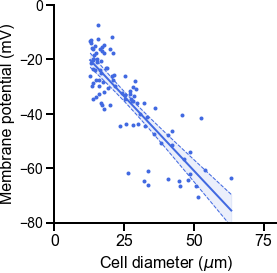

In [6]:
fig, ax = plt.subplots(figsize=(4,4));
ax, info = plot_linregress(mydata.diameter, mydata.Vmb, color = 'royalblue', label = None, ax = ax)
ax.set_xlim(left=0, right = 80);
ax.set_xticks(np.arange(0,100,25));
ax.set_xlabel('Cell diameter ($\mu$m)')


ax.set_ylim(bottom=-80,  top=0);
ax.set_yticks(np.arange(-80,10,20));
ax.set_ylabel('Membrane potential (mV)');
print(info)